In [1]:
import numpy as np
array = [
    [0, 50, 0, 29],
    [0, 80, 31, 2], 
    [33, 90, 0, 75],
    [0, 9, 0, 95]
]

kernel = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]



In [2]:
arr = np.array(array)
kernel = np.array(kernel)

In [3]:
w, h = arr.shape
n=3

In [4]:
# Digunakan ketika ingin same padding 
# jadi misalnya menggunakan kernel 3 bisa di tambahin add_padng sebelum melakukan konv
def add_padding_with_kernel_size (kernel_size) :
    return kernel_size // 2

def add_image_with_padding (img, padding):
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding * 2,  # Multiply with two because we need padding on all sides
        img.shape[1] + padding * 2
    ))
    
    img_with_padding[padding:-padding, padding:-padding] = img
    
    return img_with_padding

In [5]:
def outputShape(imgSize, kernelSize):
    numPixcel = 0
    for i in range(imgSize):
        added = i + kernelSize
        if added <= imgSize:
            numPixcel += 1
    return numPixcel
# outputShape(w, n)    

In [6]:
'''Operasi Konvolusi'''
newArr = []
target = outputShape(w, n) 
output = np.zeros(shape=(target, target))
for i in range(target):
    for j in range(target):
        mat = arr[i:i+n, j:j+n]
        sum = np.sum(np.multiply(mat, kernel))
        output[i,j] = sum+1
        
# for row in range(0, w-n, 1):
#     for column in range(0, h-n, 1):
#         tmp = arr[row:row+n, column:column+n]*kernel
#         newArr.append(tmp.sum())



In [7]:
output

array([[  30., -191.],
       [ -34.,  -21.]])

In [8]:
test = np.random.randn(3, 3) / 9
test

array([[-0.13995675,  0.00595398,  0.29646668],
       [ 0.00688521,  0.0417737 , -0.14540862],
       [ 0.07249533,  0.0866764 , -0.05324065]])

In [9]:
def reLu(img):
    length_row, length_column = img.shape
    for row in range(length_row):
        for column in range(length_column):
            if img[row, column] < 0:
                img[row, column] = 0
#     print(img.shape)
    return img

In [10]:
reLu(test)

array([[0.        , 0.00595398, 0.29646668],
       [0.00688521, 0.0417737 , 0.        ],
       [0.07249533, 0.0866764 , 0.        ]])

In [14]:
def convolusi(img= np.array, kernel= int, padding= "", bias=np.array):
    if bias == "no" :
        bias = 1
    filter = np.random.randn(kernel, kernel) / 9
    h, w = img.shape
    if padding == "Same" :
        add_padding_width = kernel//2
        img_with_padding = np.zeros(shape = (h + add_padding_width * 2, w + add_padding_width * 2))
        img_with_padding[add_padding_width:-add_padding_width, add_padding_width:-add_padding_width] = img
        img = img_with_padding
#         print(img)
    else :
        img = img
        
    target = outputShape(img.shape[0], kernel)
    output = np.zeros(shape=(target, target))
    for i in range(target):
        for j in range(target):
            mat = img[i:i+kernel, j:j+kernel]
            sum = np.sum(np.multiply(mat, filter))
            output[i,j] = sum+1
#     print(output.shape)
    return output


In [15]:
conv1 = convolusi(arr, 3, "Same")
print(conv1)

[[13.33403321 13.71444542  5.56427363  2.59216982]
 [24.6549081   9.04702159 17.04831439  6.48359573]
 [19.17276461 13.94942824 11.64080525  7.27706787]
 [13.77350492 -7.77227623  1.33033382  5.78123816]]


In [16]:
def maxPooling(arr, stride=int, pool_size=int):
    arr = np.array(arr)
    print(arr)
    w, h = arr.shape
    new_array = []
    output =[]
    for i in np.arange(w, step= stride):
        for j in np.arange(h, step = stride):
            mat = arr[i:i+pool_size, j:j+pool_size]
            if mat.shape == (pool_size, pool_size):
                new_array.append(mat)
    new_array = np.array(new_array)
#     print(new_array)
    output_pooling_shape = (int(np.sqrt(new_array.shape[0])), int(np.sqrt(new_array.shape[0])))
    for pool in new_array :
        output.append(np.max(pool))
#     print(np.array(output).reshape(output_pooling_shape).shape)
    return np.array(output).reshape(output_pooling_shape)


In [17]:
img = np.random.randn(28,28)
kernel = np.random.randn(3,3)
b =1 
kernel_size= 3

In [18]:
conv1 = convolusi(img, 3, "valid", "no")

In [19]:
conv1.shape

(26, 26)

In [20]:
maxPooling(conv1, 2, 2).shape

[[1.19773128 1.03266295 1.29863234 1.00447272 0.96803519 1.1079329
  0.78933308 1.08737844 0.78443995 0.94607191 1.15247556 0.98255305
  0.89257659 0.96862392 0.85765332 0.98799424 0.86341353 1.04454234
  0.92966917 0.99463612 0.76037182 0.76501665 1.06425218 0.9197403
  1.00918149 1.13487316]
 [0.88279115 0.79477095 0.91832598 0.8024771  1.26556475 1.01941636
  1.0753014  1.22909394 0.7574737  0.96673332 0.75063905 0.88239006
  0.97135748 1.05457038 0.98737883 1.18709779 0.84622618 1.05557086
  0.89353805 1.02154647 0.72783596 1.05778628 0.9267988  0.93407123
  1.18526311 0.81439367]
 [1.09522332 1.2556014  0.84396657 0.99513355 1.28922255 0.96695164
  0.93839223 1.29425621 1.35748422 1.20797139 0.93769937 1.22101356
  0.88354626 0.95930104 0.89270839 1.12090814 1.06854799 1.09199893
  1.30629156 1.25718342 0.82935233 1.16302476 1.03992267 1.12374901
  0.96663741 0.65054054]
 [0.93194894 0.75133745 0.61835287 1.0275569  0.97895031 0.84329079
  0.74258285 1.2934226  1.19635356 1.190360

(13, 13)

In [21]:
conv1 = convolusi(arr, 3, "Same", "no")
conv1

array([[-20.81854141,   3.77070694,   8.81248987,   7.69113562],
       [-30.8265888 ,  16.16594074,  -6.82961374,   8.01865697],
       [-24.91994006,   8.16299966, -36.65062678,   7.65932783],
       [ -6.36550199,   8.52612428, -34.26093434,  12.54263452]])

In [22]:
output = maxPooling(conv1, 2, 2)
output


[[-20.81854141   3.77070694   8.81248987   7.69113562]
 [-30.8265888   16.16594074  -6.82961374   8.01865697]
 [-24.91994006   8.16299966 -36.65062678   7.65932783]
 [ -6.36550199   8.52612428 -34.26093434  12.54263452]]


array([[16.16594074,  8.81248987],
       [ 8.52612428, 12.54263452]])

In [23]:
def flat(arr):
    array_flattern = arr.flatten()
#     print (array_flattern.shape)
    return np.array(array_flattern)

def hidden_layer(arr) :
    biases = 1
    output=[]
    arr = np.array(arr)
#     print(arr.shape)
    weights = np.random.randn(20) /9
    for i in range(weights.shape[0]) :
        output.append(weights[i]*arr[i] )
#     totals = np.array(output).reshape(arr.shape)
#     print(totals)
    return np.array(output)

def softmax(totals):
    exp = np.exp(totals)
    output = exp / np.sum(exp, axis=0)
#     print(output)
    return output



In [24]:
flatten = np.random.rand(169)

In [25]:
hidden_layer(flatten).shape

(20,)

In [26]:
weightF1 = np.random.randn(20, 169) * (1-0.5) + 0.5
weightF1.shape

(20, 169)

In [27]:
flatten = flat(output)
flatten

array([16.16594074,  8.81248987,  8.52612428, 12.54263452])

In [28]:
flatten.shape[0]

4

In [30]:
weights = np.random.randn(arr.shape[0]) /9
print(weights)
print(flatten)

output = []
for i in range(weights.shape[0]) :
    output.append(weights[i]*flatten[i] )
print(np.array(output).reshape(flatten.shape))


[-0.01235821 -0.09125107  0.21711506 -0.02181594]
[16.16594074  8.81248987  8.52612428 12.54263452]
[-0.19978205 -0.8041491   1.85115002 -0.27362933]


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
test size 264
train size 2370
Contoh X_train = [[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]


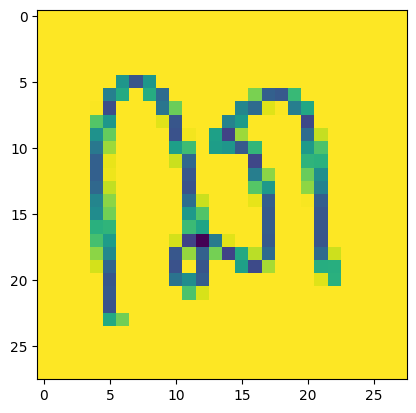

In [31]:
import load_gambar

In [32]:
train_images = load_gambar.X_data_train
train_images.shape
train_label = np.array(load_gambar.Y_label)
train_label.shape

(2370,)

In [33]:
def feed_forward (image, label):
    conv1 = convolusi(image, 3, "no")
#     print("conv1 done")
    reLuu = reLu(conv1)
#     print("reluu done")
    maxPool = maxPooling(reLuu,2,2)
    print("maxpoll done")
    flattening = flat(maxPool)
#     print("flatdone")
#     sofmax buat def baru dah
    fc1 = hidden_layer(flattening)
    out = softmax(fc1)
    print("softmax done")
    # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
    loss = -np.log(out[label])
    
    gradient = np.zeros(20)
    gradient[label] = -1 / out[label]
    
    
    acc = 1 if np.argmax(out) == label else 0
    print(acc)
    return out, loss, acc
    
    
    

In [34]:
expl_images = train_images[0]
expl_label = int(train_label[0])
expl_label

1

In [35]:
feed_forward(expl_images, expl_label)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          3.69922848  4.92310017
   6.04460238  3.72243393  2.81266939  0.          0.

(array([0.04931392, 0.04931392, 0.04931392, 0.04931392, 0.04931392,
        0.04931392, 0.04931392, 0.04931392, 0.04931392, 0.04931392,
        0.04931392, 0.04931392, 0.04931392, 0.04931392, 0.04931392,
        0.05978709, 0.05764899, 0.04422732, 0.04931392, 0.04931392]),
 3.0095489222035288,
 0)

In [ ]:
loss = 0
num_correct = 0
for i, (im, label) in enumerate(zip(train_images, train_label)):
  # Do a forward pass.
  _, l, acc = feed_forward(im, label)
  loss += l
  num_correct += acc

  # Print stats every 100 steps.
  if i % 100 == 99:
    print(
      '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %
      (i + 1, loss / 100, num_correct)
    )
    loss = 0
    num_correct = 0

In [36]:
import numpy as np

In [37]:
'''
1.  gradient loss -> softmax
    cost = -np.log(output[label])
    
''' 


'\n1.  gradient loss -> softmax\n    cost = -np.log(output[label])\n    \n'

In [38]:
fc1 = np.array(
    [-81.59171555, -78.82961058, -82.99451207, -78.87719371, -87.82847332,
 -81.44474983, -81.66183363, -82.92618867, -84.64869252, -84.34758863,
 -79.7511044,  -82.9458677,  -84.06570704, -77.99402198, -85.06419313,
 -82.63583963, -84.59170787, -83.27530124, -79.88936223, -84.28679851]
)
expSoftMax = np.array(
    [0.03737097, 0.01184392, 0.05692149, 0.05303903, 0.03679387, 0.0171316,
     0.08549397, 0.01224822, 0.05647852, 0.05272305, 0.03551716, 0.0794683,
     0.08340098, 0.11890057, 0.04978581, 0.02286274, 0.06699416, 0.01875047,
     0.05251638, 0.05175879])
loss = 2.942702629948658
label = 9
expSoftMax

array([0.03737097, 0.01184392, 0.05692149, 0.05303903, 0.03679387,
       0.0171316 , 0.08549397, 0.01224822, 0.05647852, 0.05272305,
       0.03551716, 0.0794683 , 0.08340098, 0.11890057, 0.04978581,
       0.02286274, 0.06699416, 0.01875047, 0.05251638, 0.05175879])

In [39]:
gradient = np.zeros(20)

gradient[label] = -1 / expSoftMax[label]

In [40]:
gradient

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , -18.96703624,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

In [41]:
def backprop1 (fc1, expSofmax, gradient):
    t_exp = np.exp(fc1)
    # Sum of all e^totals
    S = np.sum(t_exp)
    for i, grad in enumerate(gradient):
        if grad == 0:
            continue
        
        d_out_d_t = -t_exp[i] * t_exp / (S ** 2)
        d_out_d_t[i] = t_exp[i] * (S - t_exp[i]) / (S ** 2)
        d_L_d_t = grad * d_out_d_t
    return d_L_d_t

In [42]:
backprop1 = backprop1(fc1, expSoftMax, gradient)
backprop1

array([ 1.70948296e-04,  2.70664765e-03,  4.20376073e-05,  2.58087299e-03,
        3.34406948e-07,  1.98011849e-04,  1.59372315e-04,  4.50101505e-05,
        8.03963899e-06, -1.43440924e-02,  1.07704052e-03,  4.41330529e-05,
        1.44020371e-05,  6.24199249e-03,  5.30624044e-06,  6.01738017e-05,
        8.51107988e-06,  3.17462770e-05,  9.37966721e-04,  1.15452973e-05])

In [43]:
flattening = np.random.randn(510) / 9
w1 = np.random.randn(20, 510) - 0.5
b1 = 1
print(flattening)
print(w1.shape)
print(b1)

[ 0.00980563 -0.00444208 -0.03642472 -0.02718163 -0.02854059  0.05658606
 -0.09557771 -0.2103854  -0.13579137  0.10581726 -0.20743665 -0.15913409
  0.11973585  0.03704075 -0.02501628  0.05770487  0.06890208 -0.2056479
  0.00867041  0.04558323  0.03367181  0.05849359  0.05782601 -0.06403274
 -0.09011572  0.00164846 -0.06129117 -0.15618801 -0.11939074  0.06358982
 -0.02002343  0.02463538  0.20351154 -0.17148868 -0.1998107   0.01435211
  0.01116972  0.09160085 -0.03656252 -0.02978569 -0.18277494 -0.16232001
  0.15222852 -0.149315    0.09834741  0.03389586  0.09014918  0.02521084
  0.01230432  0.17103082  0.19520056  0.0068339  -0.07422327  0.03500533
 -0.11080808 -0.01209016  0.09801881  0.00501262 -0.04012086 -0.10636614
  0.07393825 -0.09658032  0.02470198 -0.02106086 -0.01648404  0.16573957
  0.06885171 -0.1690414   0.03917298  0.11430174 -0.07838641 -0.05289162
 -0.08967761  0.09332763  0.21506812  0.18597809  0.03970909  0.00379045
  0.19234912  0.01798185  0.08201716 -0.02566748  0.

In [76]:
def hidden_layer(arr, weights, bias) :
    if bias == "no initial" and weights == "no initial" :
        bias = 0.5
        weights = np.random.randn(20, arr.shape[0]) - 0.5
        
    output=[]
    arr = np.array(arr)
    totals = np.dot(weights, arr) + bias
    return totals, weights, bias

In [79]:
fc, w1, b1 = hidden_layer(flattening, w1, 1)
fc

array([10.01645063,  0.59904579, -0.89808002,  0.17537572,  3.57622058,
        2.1565136 , -2.17077538,  2.00438744,  3.59080474,  0.36838739,
        0.1211291 , -2.63246849,  5.7256993 , -0.98545205,  2.39906804,
        0.07218136, -0.53300248, -3.04755434,  2.36431184, -1.18461033])

In [80]:
#w1, b1 itu dari fc
def backprop2(backprop1, w1, b1, flattening, lr= 0.005):
    d_t_d_w = flattening
    d_t_d_b = np.array(b1)
    d_t_d_inputs = w1
    print((d_t_d_w[np.newaxis].T).shape)
    print((backprop1[np.newaxis]).shape)
    d_L_d_w = d_t_d_w[np.newaxis].T @ backprop1[np.newaxis]
    print(d_L_d_w.shape)
    d_L_d_b = backprop1 * d_t_d_b
    print(d_L_d_b.shape)
    d_L_d_inputs =  backprop1 @ d_t_d_inputs

      # Update weights / biases
    w1 -= lr * d_t_d_inputs
    b1 -= lr * d_L_d_b
    print("bias" ,b1)
    print (b1.shape)
    return w1, b1
    
    

In [81]:
updatew1, updateb1 = backprop2(backprop1, w1, b1, flattening, lr= 0.005)

(510, 1)
(1, 20)
(510, 20)
(20,)
bias [0.99999915 0.99998647 0.99999979 0.9999871  1.         0.99999901
 0.9999992  0.99999977 0.99999996 1.00007172 0.99999461 0.99999978
 0.99999993 0.99996879 0.99999997 0.9999997  0.99999996 0.99999984
 0.99999531 0.99999994]
(20,)


In [82]:
hidden_layer(flattening, updatew1, updateb1)

C:\Users\Cindi Tri Fitikasari\AppData\Local\Temp\ipykernel_4296\1262763276.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bias == "no initial" and weights == "no initial" :


(array([ 9.97136752,  0.60103703, -0.88858983,  0.17948593,  3.56333947,
         2.15073004, -2.1549223 ,  1.99936528,  3.57785067,  0.37161717,
         0.12551807, -2.61430636,  5.70207073, -0.975556  ,  2.39207267,
         0.07682015, -0.52533751, -3.02731672,  2.3574856 , -1.17368733]),
 array([[-0.29679859, -1.39598306,  0.6003774 , ...,  0.72180313,
         -0.66713931,  0.18235727],
        [-0.11275308, -0.35389808, -1.48848884, ..., -0.19339863,
         -0.53623028, -1.26984867],
        [-0.32803964, -1.23763658, -0.42099502, ..., -0.13382887,
         -0.67634022, -1.43743906],
        ...,
        [ 0.20633782, -0.14477924, -2.04703184, ..., -2.27327116,
         -1.72332922, -1.66421196],
        [-0.86770133, -0.1830255 , -0.13911663, ..., -1.20333093,
          0.17757524, -0.12260077],
        [-1.22776111, -0.78063132, -0.17863963, ..., -0.51025632,
          0.94328314, -0.27470519]]),
 array([0.99999915, 0.99998647, 0.99999979, 0.9999871 , 1.        ,
        0.9

In [83]:
array_awal = np.random.rand(6,6)
array_awal

array([[0.23593324, 0.99877687, 0.10916673, 0.09465596, 0.96592068,
        0.67929124],
       [0.16474495, 0.16329563, 0.89347835, 0.51396344, 0.52937299,
        0.65963095],
       [0.69803835, 0.57054759, 0.13466601, 0.23849336, 0.7724621 ,
        0.90609425],
       [0.76889211, 0.05932805, 0.12918574, 0.42499056, 0.60313649,
        0.2030265 ],
       [0.82297368, 0.38813348, 0.57855619, 0.86149765, 0.45507298,
        0.36031004],
       [0.04915962, 0.08626115, 0.27658587, 0.29139316, 0.46214537,
        0.41998758]])

In [84]:

def maxPooling(arr, stride=int, pool_size=int):
    arr = np.array(arr)
#     print(arr)
    w, h = arr.shape
    new_array = []
    output =[]
    for i in np.arange(w, step= stride):
        for j in np.arange(h, step = stride):
            mat = arr[i:i+pool_size, j:j+pool_size]
            if mat.shape == (pool_size, pool_size):
                new_array.append(mat)
    new_array = np.array(new_array)
#     print(new_array)
    output_pooling_shape = (int(np.sqrt(new_array.shape[0])), int(np.sqrt(new_array.shape[0])))
    for pool in new_array :
        output.append(np.max(pool))
#     print(np.array(output).reshape(output_pooling_shape).shape)
    return np.array(output).reshape(output_pooling_shape)


In [86]:
flatten = maxPooling(array, stride=1, pool_size=2).flatten()
print(flatten.shape)

(9,)


In [87]:
def backMaxPooling(array_awal, stride, pool_size):
    
    arr = np.array(array_awal)
#     print(arr)
    w, h = arr.shape
    new_array = []
    output =[]
    for i in np.arange(w, step= stride):
        for j in np.arange(h, step = stride):
            mat = arr[i:i+pool_size, j:j+pool_size]
#             print(mat)
            if mat.shape == (pool_size, pool_size):
                valueMax = np.max(mat)
                for k in range(mat.shape[0]):
                    for l in range(mat.shape[0]):
                        if mat[k,l] != valueMax :
                            mat[k,l] = 0
                        elif mat[k,l] == valueMax :
                            mat[k,l] = 1
                        else :
                            mat[k,l] = 0
                            
                        
    return arr

In [88]:

myarray =np.random.randn(5,5)
print(myarray)

for i in np.arange(5, step= 1):
    for j in np.arange(5, step = 1):
        mat = myarray[i:i+2, j:j+2]
#     print(mat)
        if mat.shape == (2, 2):
            valueMax = np.max(mat)
            for k in range(mat.shape[0]):
                for l in range(mat.shape[0]):
                    if mat[k,l] != valueMax :
                        mat[k,l] = 0
                    elif mat[k,l] == valueMax :
                        mat[k,l] = 1
                    else :
                        mat[k,l] = 0
                            
                        
print(myarray)
                        

[[ 0.36875784 -0.1066318   1.84616871  0.65283518 -1.0962586 ]
 [-1.81805881  1.24385875 -1.23136251 -0.19781882  1.6710563 ]
 [ 0.81026955  1.66007481 -0.00552358  1.3456797   0.47043875]
 [ 0.09315406 -0.1686977   0.83430783 -0.16201568 -0.81623761]
 [-0.57729152 -1.27567294 -0.0249664   1.25170893  1.9065595 ]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [89]:
backMaxPooling(array_awal, stride=1, pool_size=2)

array([[0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [90]:
massa = np.random.rand(4,4) 
print(massa)
maxnum = np.max(massa)
for i in range(4)  :
    for j in range(4):
        if massa[i,j] != maxnum :
            massa[i,j] = 0
            
print(massa)

[[0.07453201 0.37407241 0.55388266 0.33385317]
 [0.45016552 0.64416848 0.98207585 0.74847508]
 [0.40335827 0.01329275 0.85812176 0.82503965]
 [0.03417692 0.08169548 0.62641463 0.05651592]]
[[0.         0.         0.         0.        ]
 [0.         0.         0.98207585 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]


In [ ]:
# Mulai backprop di cnn
#hasil dari backprop cnn, jika nilai nya ada ubah ke 1 dan jika 0 nol
# anggep kita udh punya nilai z atau f(x.w)

In [91]:
arr = np.random.rand(224, 224)
print(arr)
kernel = np.random.rand(3, 3)
print (kernel)
z = convolusi(arr, 3, "no")
z.shape


[[0.03257309 0.77453966 0.86333751 ... 0.78174226 0.23168957 0.2274109 ]
 [0.88049564 0.49750686 0.17171568 ... 0.898715   0.94688063 0.47667986]
 [0.29575258 0.22989141 0.76401094 ... 0.14399522 0.07320337 0.23793169]
 ...
 [0.2402422  0.76316765 0.32827889 ... 0.73606006 0.94437196 0.54195438]
 [0.11472515 0.05780152 0.28893884 ... 0.18955412 0.50724996 0.00648687]
 [0.31470857 0.71171992 0.30069965 ... 0.10233013 0.957519   0.49767808]]
[[0.34676791 0.4114254  0.72545494]
 [0.08042253 0.93683182 0.21810756]
 [0.63859872 0.16304119 0.70751778]]


(222, 222)

In [92]:
arr = np.random.rand(28, 28)
print(arr)
kernel = np.random.rand(2, 2)
print (kernel)
z = convolusi(arr, 2, "no")
z.shape


[[8.48187156e-01 8.71418704e-01 8.30070823e-01 3.66516055e-01
  1.64240889e-01 7.80270638e-01 7.92048908e-01 5.47082387e-01
  2.01497120e-01 5.70920623e-01 6.24702477e-01 2.18459378e-01
  6.78092370e-02 5.42780310e-01 2.45202017e-01 6.95365874e-01
  5.96394494e-02 6.55376394e-01 1.48451213e-01 3.59829429e-01
  3.36800773e-01 8.19604933e-02 3.45073060e-02 7.25421297e-01
  8.88097841e-01 4.75878530e-01 3.42550204e-01 6.26856055e-01]
 [2.76697897e-02 1.01223853e-01 1.90064229e-01 2.27947475e-01
  4.08257666e-01 4.96245159e-01 1.59713784e-03 1.39549214e-01
  4.22710038e-01 6.39911716e-01 2.73309264e-01 9.96565552e-01
  5.34529909e-01 3.69547415e-01 8.59066726e-01 6.71653583e-01
  4.98497771e-01 2.11259970e-01 7.79266201e-01 4.31376116e-01
  4.90077480e-01 3.31237523e-01 9.87757346e-01 4.27902962e-02
  5.85572393e-01 6.88881096e-01 3.68182074e-01 5.39738444e-01]
 [5.85964587e-01 3.06076444e-01 2.65742300e-01 1.07087178e-01
  9.51182977e-01 8.59196729e-01 9.34288150e-01 5.76354263e-01
  3.74

(27, 27)

In [96]:
backConvolusi(z, kernel, arr)

(2, 2)
(27, 27)
(28, 28)
(2, 2)
(28, 28)


(array([[-1.4113853 , -1.13744684],
        [-0.98728017, -1.51774013]]),
 array([[ 0.84633973,  0.86584519,  0.82473368,  0.36162289,  0.15958532,
          0.77551903,  0.78702424,  0.54185633,  0.19673098,  0.56639977,
          0.62016931,  0.21416749,  0.06412399,  0.53838224,  0.24080465,
          0.69132462,  0.0554593 ,  0.65082812,  0.14396845,  0.35577177,
          0.33244039,  0.0777502 ,  0.03039796,  0.72107484,  0.88285859,
          0.47145771,  0.33822177,  0.62367513],
        [ 0.02265547,  0.09224002,  0.1810439 ,  0.21907969,  0.39951169,
          0.48818634, -0.00667185,  0.13142242,  0.41419708,  0.63123602,
          0.26446032,  0.98838996,  0.52646987,  0.36141978,  0.85074619,
          0.6628771 ,  0.48969251,  0.20251134,  0.77094406,  0.42290902,
          0.4813938 ,  0.32286501,  0.97987228,  0.03347392,  0.57680608,
          0.68087306,  0.35953425,  0.53563078],
        [ 0.58175447,  0.29766564,  0.25778323,  0.09855615,  0.94237185,
          0.85

In [94]:
# convolusi buat back convolusi dengan kernel sudah berupa array
def convolusiBack(img= np.array, kernel= np.array, padding= ""):
    kernel_size = kernel.shape[0]
    h, w = img.shape
    if padding == "Same" :
        add_padding_width = kernel_size//2
        img_with_padding = np.zeros(shape = (h + add_padding_width * 2, w + add_padding_width * 2))
        img_with_padding[add_padding_width:-add_padding_width, add_padding_width:-add_padding_width] = img
        img = img_with_padding
#         print(img)
    else :
        img = img
        
    target = outputShape(img.shape[0], kernel_size)
    output = np.zeros(shape=(target, target))
    for i in range(target):
        for j in range(target):
            mat = img[i:i+kernel_size, j:j+kernel_size]
            output[i,j] = np.sum(np.multiply(mat, kernel))
#     print(output.shape)
    return output


In [97]:
def backConvolusi(dz, w, inputan, lr=0.005):
    w = np.array(w)
    print(w.shape)
    dz= np.array(dz)
    print(z.shape)
    inputan = np.array(inputan)
    print(inputan.shape)
    dW = convolusiBack(inputan, dz, "no")
    w_rotate = np.rot90(w, 2)
    dX = convolusiBack(dz, w_rotate, "Same")
    
    wUpdate = w - lr*dW
    inputUpdate = inputan -lr*dX
    print (wUpdate.shape)
    print(inputUpdate.shape)
    
    return wUpdate, inputUpdate

In [98]:
backConvolusi(z, kernel, arr)

(2, 2)
(27, 27)
(28, 28)
(2, 2)
(28, 28)


(array([[-1.4113853 , -1.13744684],
        [-0.98728017, -1.51774013]]),
 array([[ 0.84633973,  0.86584519,  0.82473368,  0.36162289,  0.15958532,
          0.77551903,  0.78702424,  0.54185633,  0.19673098,  0.56639977,
          0.62016931,  0.21416749,  0.06412399,  0.53838224,  0.24080465,
          0.69132462,  0.0554593 ,  0.65082812,  0.14396845,  0.35577177,
          0.33244039,  0.0777502 ,  0.03039796,  0.72107484,  0.88285859,
          0.47145771,  0.33822177,  0.62367513],
        [ 0.02265547,  0.09224002,  0.1810439 ,  0.21907969,  0.39951169,
          0.48818634, -0.00667185,  0.13142242,  0.41419708,  0.63123602,
          0.26446032,  0.98838996,  0.52646987,  0.36141978,  0.85074619,
          0.6628771 ,  0.48969251,  0.20251134,  0.77094406,  0.42290902,
          0.4813938 ,  0.32286501,  0.97987228,  0.03347392,  0.57680608,
          0.68087306,  0.35953425,  0.53563078],
        [ 0.58175447,  0.29766564,  0.25778323,  0.09855615,  0.94237185,
          0.85

In [99]:
gfg1 = np.random.randn(10)
gfg2 = np.random.randn(2, 10)
		
print(gfg1)
print(gfg2)
# applying matrix.dot() method
geeks = gfg2.dot(gfg1)

print(geeks)

[-1.01188517 -0.13088477  2.24308941  0.8432228  -0.35600541 -1.41164627
  1.54682391  2.12009061 -0.23453415 -0.81732062]
[[ 1.08453624  0.11664916  0.43110551  0.12124803  0.26587228  0.01091593
   0.33680875 -0.90118293  0.01095148 -0.50098021]
 [ 0.11357105  0.22784734  0.33783959 -1.01938619 -0.08561187  0.72805635
   0.31264479 -0.79157148 -0.17494865 -0.92534485]]
[-1.13622051 -1.64104957]


In [100]:
import numpy as np
arrayAwal = np.random.randn(6,6)

In [101]:
# inputan hasil dari relo, output buat relu juga
def backMaxPooling(flat, array_awal, stride, pool_size):
    
    arr = np.array(array_awal)
#     print(arr)
    w, h = arr.shape
    new_array = []
    output =[]
    for m in flat :
        for i in np.arange(w, step= stride):
            for j in np.arange(h, step = stride):
                mat = arr[i:i+pool_size, j:j+pool_size]
    #             print(mat)
                if mat.shape == (pool_size, pool_size):
                    valueMax = np.max(mat)
                    for k in range(mat.shape[0]):
                        for l in range(mat.shape[0]):
                            if mat[k,l] != valueMax :
                                mat[k,l] = 0
                            elif mat[k,l] == valueMax :
                                mat[k,l] = m
                            else :
                                mat[k,l] = 0


    return arr

In [102]:
print(arrayAwal)

[[-0.19568874  0.95310724  0.22071747 -0.43131386 -1.42673229 -1.21704204]
 [-0.80036028  1.37505882  0.36984388  0.00790432  0.31147456 -0.38089945]
 [ 2.65912976 -0.75019411 -0.10822537 -0.26768835  0.55969894 -0.03191257]
 [-1.20766889  0.64156878 -0.80462335 -0.74548467 -0.37978044  0.61005311]
 [ 0.48972387  0.0898545  -0.04601677  0.44570231 -0.38527174  1.47893288]
 [-1.3833873  -1.38276075 -0.95252914  1.06992124  0.84737873 -0.94970149]]


In [104]:
flatt = np.random.randn(9)
flatt

array([-2.82675163, -1.20542614, -0.80756676, -1.82597792,  0.68116486,
       -0.13489727, -0.16666293,  0.43597086,  1.62903593])

In [105]:
back =backMaxPooling(flatt, arrayAwal, 2, 2)
print(back.shape)
back

(6, 6)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.62903593, 1.62903593, 0.        , 1.62903593,
        0.        ],
       [1.62903593, 0.        , 1.62903593, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.62903593],
       [1.62903593, 0.        , 0.        , 0.        , 0.        ,
        1.62903593],
       [0.        , 0.        , 0.        , 1.62903593, 0.        ,
        0.        ]])

In [106]:
for k in flatt : 
    for i in range(back.shape[0]):
        for j in range(back.shape[0]):
            if back[i,j] == 1 :
                back[i,j] = k


In [107]:
def maxPooling(arr, stride=int, pool_size=int):
    arr = np.array(arr)
#     print(arr)
    w, h = arr.shape
    new_array = []
    output =[]
    for i in np.arange(w, step= stride):
        for j in np.arange(h, step = stride):
            mat = arr[i:i+pool_size, j:j+pool_size]
            if mat.shape == (pool_size, pool_size):
                new_array.append(mat)
    new_array = np.array(new_array)
#     print(new_array)
    output_pooling_shape = (int(np.sqrt(new_array.shape[0])), int(np.sqrt(new_array.shape[0])))
    for pool in new_array :
        output.append(np.max(pool))
#     print(np.array(output).reshape(output_pooling_shape).shape)
    return np.array(output).reshape(output_pooling_shape)


In [108]:
back

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.62903593, 1.62903593, 0.        , 1.62903593,
        0.        ],
       [1.62903593, 0.        , 1.62903593, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.62903593],
       [1.62903593, 0.        , 0.        , 0.        , 0.        ,
        1.62903593],
       [0.        , 0.        , 0.        , 1.62903593, 0.        ,
        0.        ]])

In [109]:
maxPooling(arrayAwal, stride=2, pool_size=2)

array([[ 1.37505882,  0.36984388,  0.31147456],
       [ 2.65912976, -0.10822537,  0.61005311],
       [ 0.48972387,  1.06992124,  1.47893288]])

In [ ]:
flattten = np.random.randn(20)
flatten


In [ ]:
weigth = np.random.randn(20)
weigth

In [ ]:
withat = flattten[np.newaxis].T  @weigth[np.newaxis]
withat

In [ ]:
withmatmul = np.matmul(flattten[np.newaxis].T,weigth[np.newaxis] )
withmatmul

In [ ]:
withmatmul.shape

In [ ]:
weight= np.random.randn(50, 169) - 0.5

In [ ]:
weight.shape

In [ ]:
flatten = np.random.randn(169)

In [ ]:
weight.dot(flatten)